In [1]:
# Importing essential libraries.
from data_imports import *
from data_clean import CVAO_data, GEOS_FP_A1_data
from ml_model import MODEL

# Assigning datasets to variables.
CVAO_df = CVAO_data()
GEOS_df = GEOS_FP_A1_data()

# Analysis of Missing Data in the CVAO Dataset

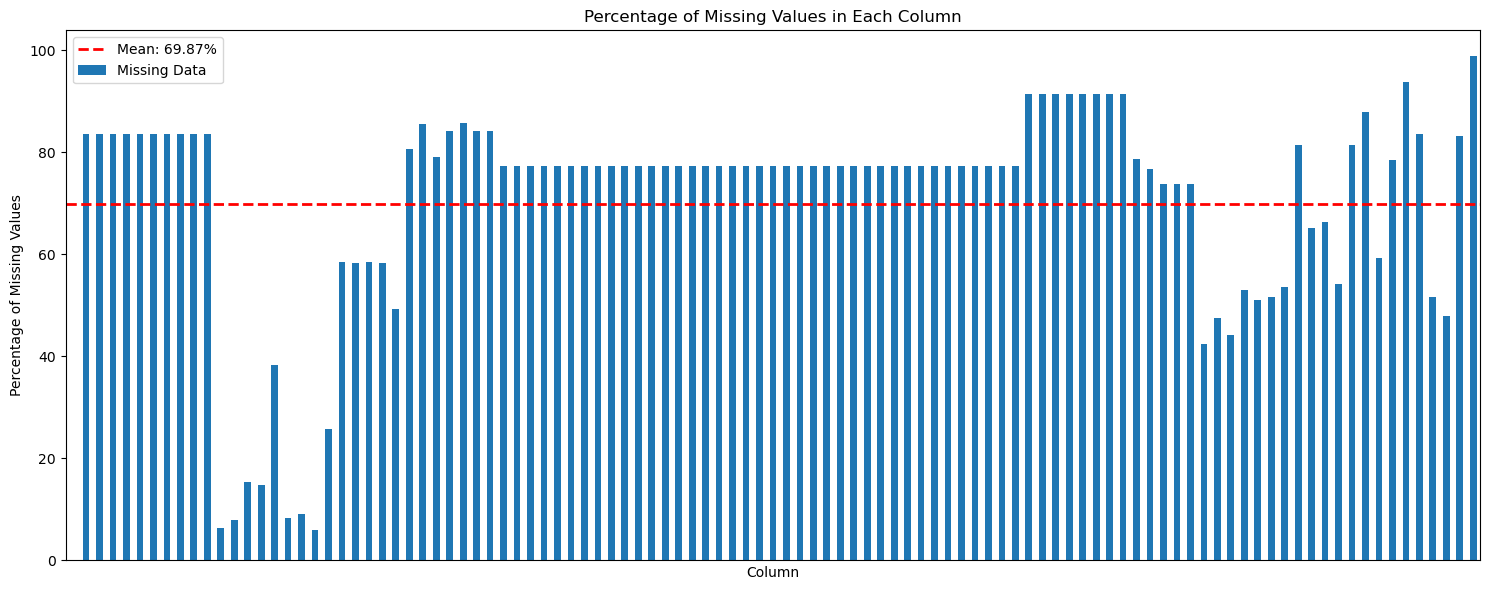

In [12]:
# Calculating the percentage missing for each variable.
# Assigning DataFrame of missing percentages to variable.
missing_percentage = CVAO_df.isnull().mean() * 100
missing_df = pd.DataFrame(missing_percentage, columns=['Missing Data'])

# Plotting a barchart.
plt.figure(figsize=(15, 6))
missing_df['Missing Data'].plot(kind='bar')

# Calculating mean of missing data across all variable.
mean_missing = missing_df['Missing Data'].mean()

# Plotting line of mean missing data.
plt.axhline(mean_missing, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_missing:.2f}%')

# Customising plot.
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Values')
plt.xticks([])
plt.legend()
plt.tight_layout()

# Saving and showing plot.
plt.savefig(f'/Users/callumwilson/Documents/GitHub/ML-Project/Output/A1_missing_barchart', bbox_inches='tight')
plt.show()

In [3]:
# Calculating percentage of data missing for target variable.
missing_in_ozone = CVAO_df['O3_ppbV'].isnull().mean() * 100
print(f"Percentage of missing data in O3_ppbV: {missing_in_ozone:.2f}%")

Percentage of missing data in O3_ppbV: 6.05%


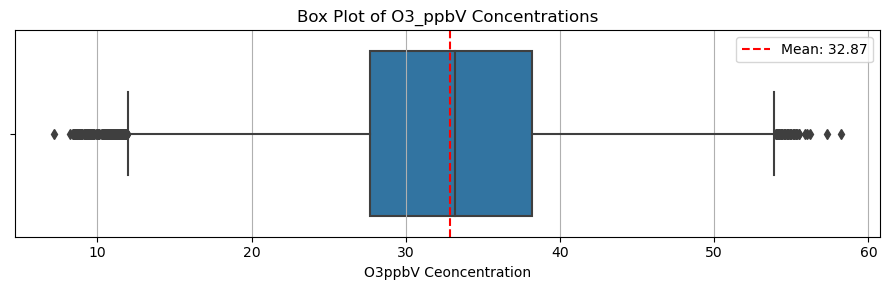

In [13]:
# Calculating mean of target variable.
O3_mean = CVAO_df['O3_ppbV'].mean()

# Plotting boxplot of target variable.
plt.figure(figsize=(9, 3))
sns.boxplot(x = CVAO_df['O3_ppbV'])

# Plotting line of mean of target variable.
plt.axvline(CVAO_df['O3_ppbV'].mean(), color='red', linestyle='--', label=f'Mean: {O3_mean:.2f}')

# Customising plot.
plt.grid(axis = 'x')
plt.title('Box Plot of O3_ppbV Concentrations')
plt.legend()
plt.xlabel('O3ppbV Ceoncentration')
plt.tight_layout()

# Saving and showing plot.
plt.savefig(f'/Users/callumwilson/Documents/GitHub/ML-Project/Output/A1_missing_boxplot', bbox_inches='tight')
plt.show()

# Training XGBoost Regessor Model on CVAO Dataset

In [15]:
# Assigning ml model to variable.
mod = XGBRegressor()

# Assigning dataframe to model.
CVAO = MODEL(CVAO_df, 'O3_ppbV', mod)

print('Preparing Model')
CVAO.prepare_data()

print('Training Model')
CVAO.train_model()

print('Evaluating Model')
CVAO.evaluate_model()

print('Calculating Model Metrics')
CVAO_data = CVAO.model_metrics()

Preparing Model
Training Model
Evaluating Model
Training Set - MSE:  8.49411, RMSE:  2.91447, MAE:  2.15640, R2:  0.84411
Testing Set  - MSE:  9.85536, RMSE:  3.13933, MAE:  2.36101, R2:  0.81934
Calculating Model Metrics


# Training XGBoost Regressor on Merged CVAO GEOS-FP Dataset

In [6]:
# Merging CVAO and GEOS-FP datasets
B1_df = pd.merge(CVAO_df, GEOS_df, left_index=True, right_index=True, how='outer')

# Assigning dataframe to model.
GEOS_CVAO = MODEL(B1_df, 'O3_ppbV', mod)

print('Preparing Model')
GEOS_CVAO.prepare_data()

print('Training Model')
GEOS_CVAO.train_model()

print('Evaluating Model')
GEOS_CVAO.evaluate_model()

print('Calculating Model Metrics')
GEOS_CVAO_data = GEOS_CVAO.model_metrics()

Preparing Model
Training Model
Evaluating Model
Training Set - MSE:  8.41547, RMSE:  2.90094, MAE:  2.12136, R2:  0.84555
Testing Set  - MSE:  9.61925, RMSE:  3.10149, MAE:  2.31095, R2:  0.82367


# Performance Metrics for Merged CVAO GEOS-FP Dataset

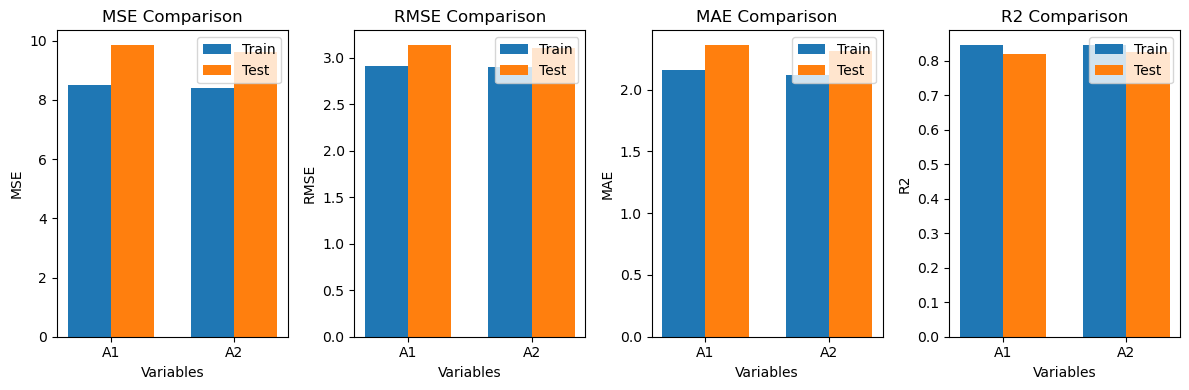

In [7]:
# Assigning dictionary of metrics to variable.
A1_A2_metrics = {'A1':CVAO_data, 'A2':GEOS_CVAO_data}

# Creating lists of labels for metrics and models.
metrics = ['mse', 'rmse', 'mae', 'r2']
variables = ['A1', 'A2']

# Creating subplot.
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs = axs.flatten()

# Looping through each metrics for each model and plotting barchart.
for i, metric in enumerate(metrics):
    ax = axs[i]
    
    train_values = [A1_A2_metrics[var]['train'][metric] for var in variables]
    test_values = [A1_A2_metrics[var]['test'][metric] for var in variables]
    
    x = np.arange(len(variables))
    width = 0.35
    
    ax.bar(x - width/2, train_values, width, label='Train')
    ax.bar(x + width/2, test_values, width, label='Test')
    
    ax.set_xlabel('Variables')
    ax.set_ylabel(metric.upper())
    ax.set_title(f'{metric.upper()} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(variables)
    ax.legend()

# Saving and showing plot.
plt.tight_layout()
plt.savefig(f'/Users/callumwilson/Documents/GitHub/ML-Project/Output/A1_A2_metrics', bbox_inches='tight')
plt.show()

# Training XGBoost Regessor Model on CVAO Dataset Fit to Timeline of GEOS-FP Dataset

Preparing Model
Training Model
Evaluating Model
Training Set - MSE:  2.63349, RMSE:  1.62280, MAE:  1.23083, R2:  0.94943
Testing Set  - MSE:  4.19328, RMSE:  2.04775, MAE:  1.58563, R2:  0.92033
Model SHAP Summary


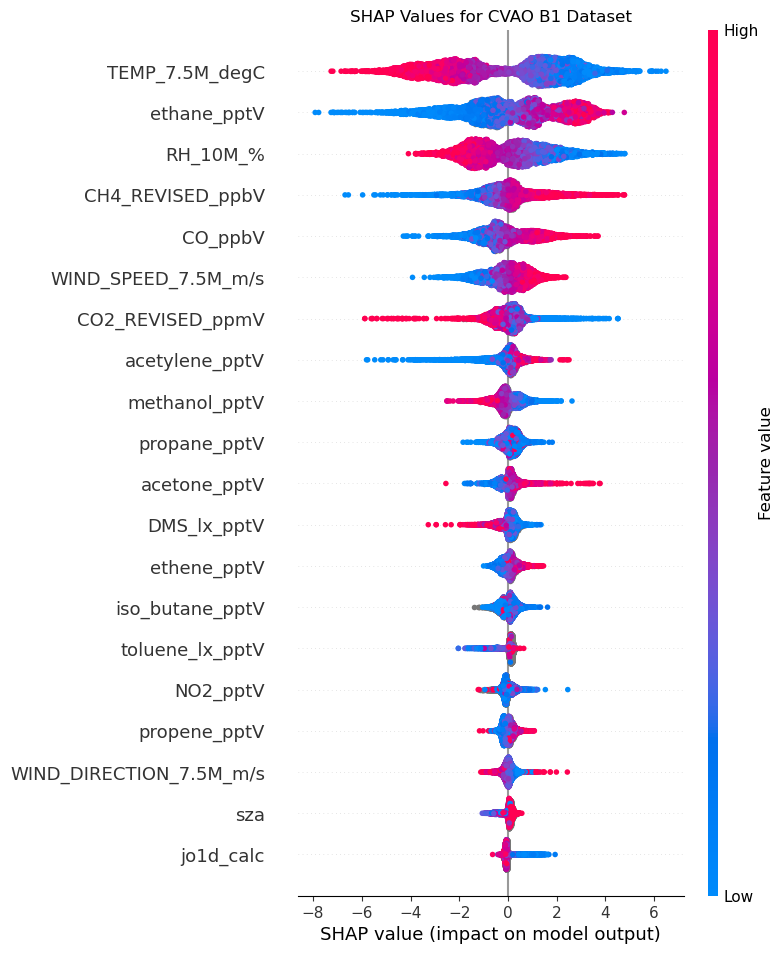

Most Important Features Metrics
Training Set - MSE: 26.99760, RMSE:  5.19592, MAE:  4.03697, R2:  0.48161
Testing Set  - MSE: 27.24371, RMSE:  5.21955, MAE:  4.07025, R2:  0.48241
Training Set - MSE: 16.48813, RMSE:  4.06056, MAE:  3.11990, R2:  0.68341
Testing Set  - MSE: 18.09310, RMSE:  4.25360, MAE:  3.28330, R2:  0.65626
Training Set - MSE: 12.08758, RMSE:  3.47672, MAE:  2.66005, R2:  0.76790
Testing Set  - MSE: 14.62080, RMSE:  3.82372, MAE:  2.94514, R2:  0.72223
Training Set - MSE:  7.65758, RMSE:  2.76723, MAE:  2.09728, R2:  0.85296
Testing Set  - MSE:  9.60538, RMSE:  3.09925, MAE:  2.36913, R2:  0.81751
Training Set - MSE:  5.96706, RMSE:  2.44276, MAE:  1.83582, R2:  0.88542
Testing Set  - MSE:  7.55222, RMSE:  2.74813, MAE:  2.08889, R2:  0.85652
Training Set - MSE:  5.41695, RMSE:  2.32743, MAE:  1.74394, R2:  0.89599
Testing Set  - MSE:  6.97762, RMSE:  2.64152, MAE:  2.00676, R2:  0.86744
Training Set - MSE:  4.13766, RMSE:  2.03412, MAE:  1.52200, R2:  0.92055
Testin

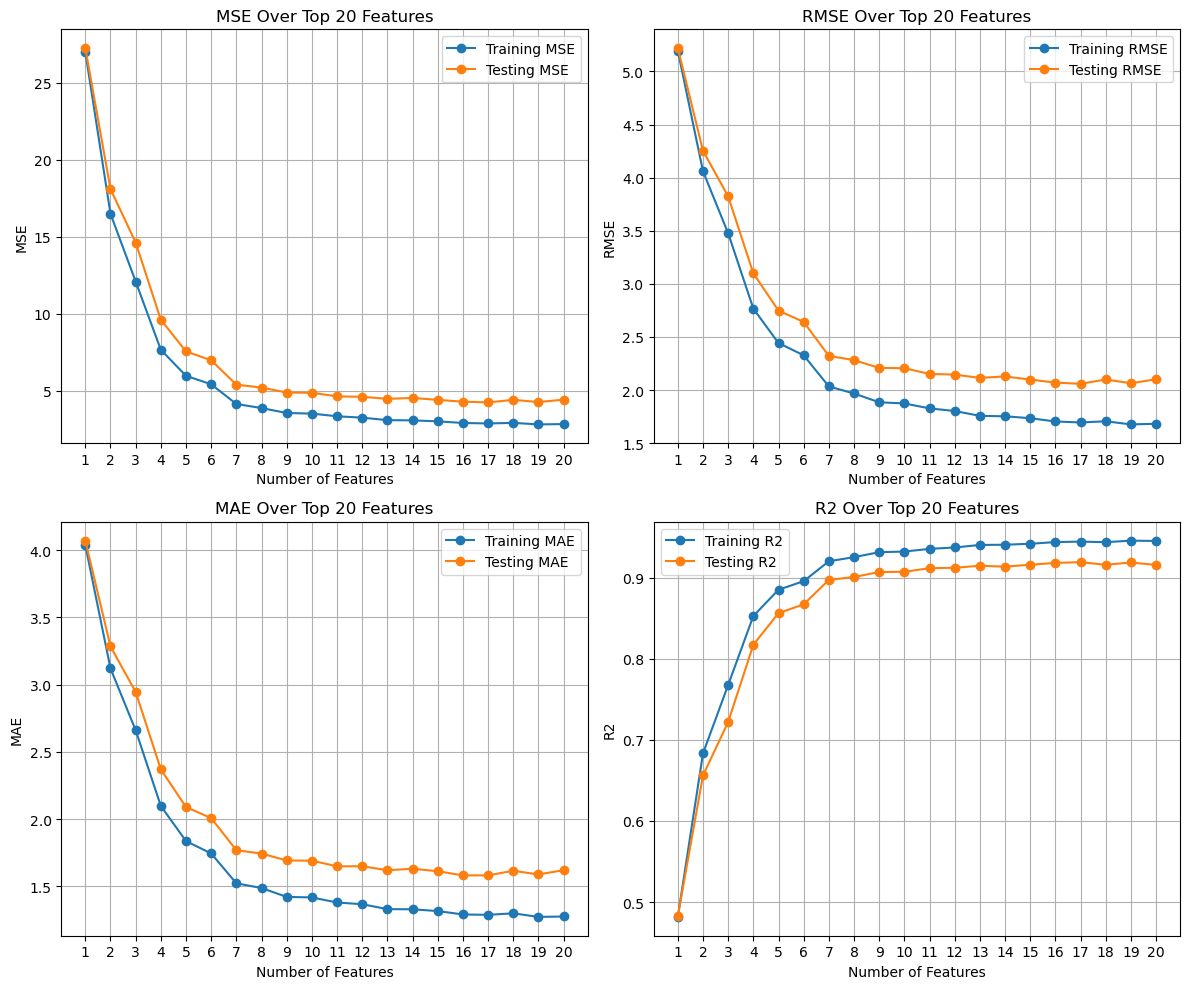

In [8]:
# Merging datasets with respect to GEOS-FP dataset.
CVAO_filt = CVAO_df[CVAO_df.index.isin(GEOS_df.index)]

# Assigning DataFrame to model.
CVAO_F = MODEL(CVAO_filt, 'O3_ppbV', mod)

print('Preparing Model')
CVAO_F.prepare_data()

print('Training Model')
CVAO_F.train_model()

print('Evaluating Model')
CVAO_F.evaluate_model()

print('Model SHAP Summary')
CVAO_F.shap_summary(file_name = 'B1_SHAP', title = 'SHAP Values for CVAO B1 Dataset')

print('Most Important Features Metrics')
CVAO_F.feature_importance(20, 'B1_top20_metrics')

print('Calculating Model Metrics')
CVAO_F_data = CVAO_F.model_metrics()

# Training XGBoost Regessor Model on Merged CVAO GEOS-FP Dataset Fit to Timeline of GEOS-FP Dataset

Preparing Model
Training Model
Evaluating Model
Training Set - MSE:  1.70943, RMSE:  1.30745, MAE:  1.00171, R2:  0.96718
Testing Set  - MSE:  3.14142, RMSE:  1.77240, MAE:  1.35974, R2:  0.94032
Model SHAP Summary


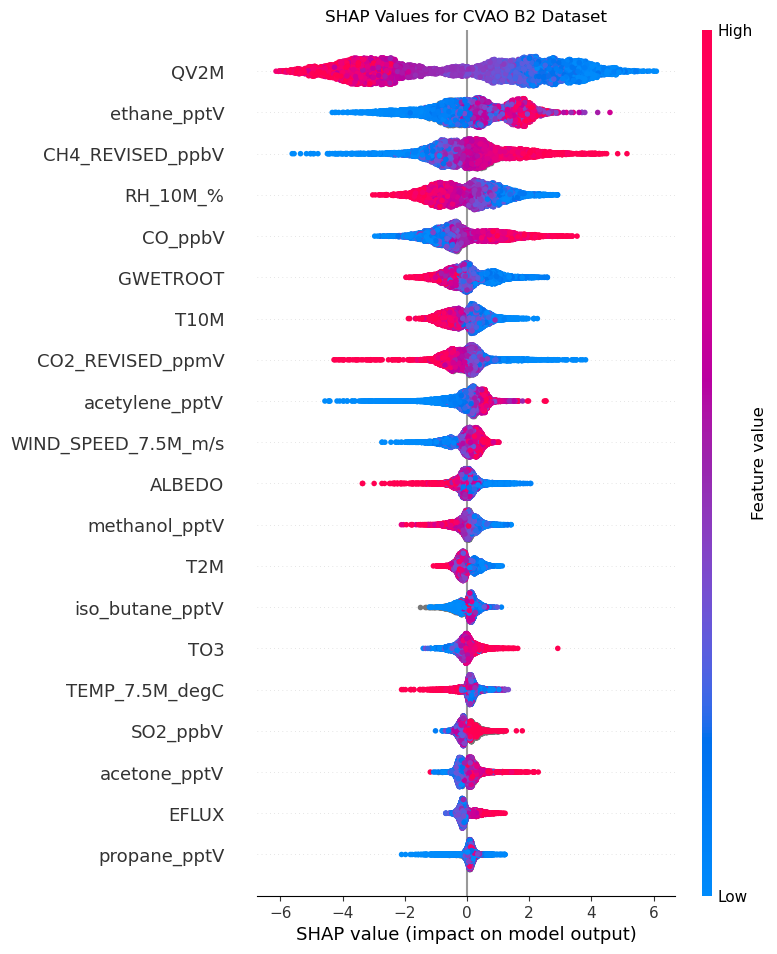

Training Set - MSE: 23.92251, RMSE:  4.89106, MAE:  3.84032, R2:  0.54066
Testing Set  - MSE: 23.98423, RMSE:  4.89737, MAE:  3.85572, R2:  0.54433
Training Set - MSE: 15.11548, RMSE:  3.88786, MAE:  3.00519, R2:  0.70976
Testing Set  - MSE: 17.42117, RMSE:  4.17387, MAE:  3.24094, R2:  0.66902
Training Set - MSE:  9.70237, RMSE:  3.11486, MAE:  2.35263, R2:  0.81370
Testing Set  - MSE: 11.90634, RMSE:  3.45056, MAE:  2.62915, R2:  0.77380
Training Set - MSE:  8.22047, RMSE:  2.86714, MAE:  2.16209, R2:  0.84216
Testing Set  - MSE: 10.42399, RMSE:  3.22862, MAE:  2.45133, R2:  0.80196
Training Set - MSE:  6.31347, RMSE:  2.51266, MAE:  1.87937, R2:  0.87877
Testing Set  - MSE:  8.18318, RMSE:  2.86063, MAE:  2.16895, R2:  0.84453
Training Set - MSE:  3.83491, RMSE:  1.95829, MAE:  1.46574, R2:  0.92636
Testing Set  - MSE:  4.95798, RMSE:  2.22665, MAE:  1.67863, R2:  0.90581
Training Set - MSE:  3.22771, RMSE:  1.79658, MAE:  1.34296, R2:  0.93802
Testing Set  - MSE:  4.44473, RMSE:  2

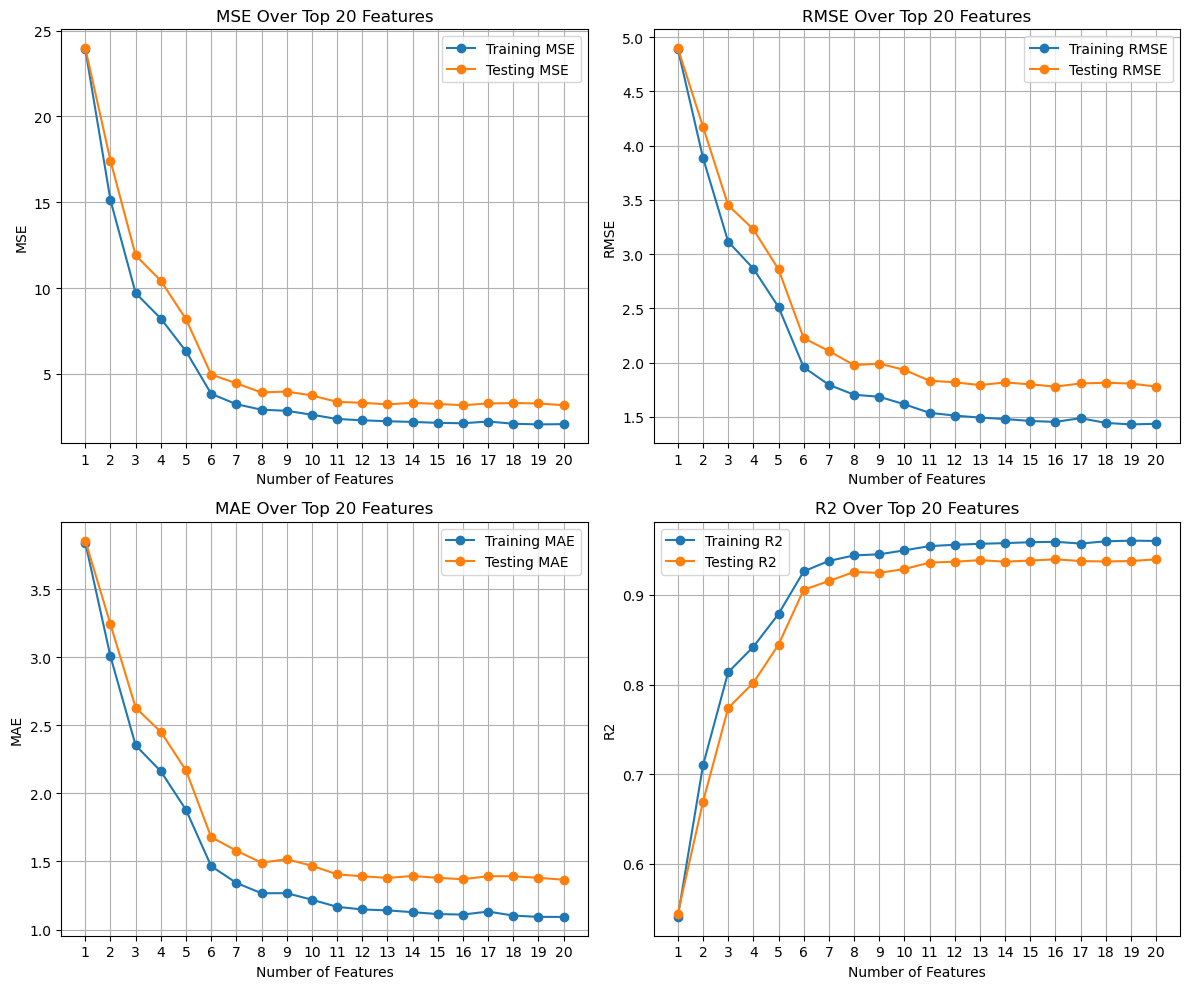

In [9]:
# Mergning both datasets.
merged = pd.merge(CVAO_filt, GEOS_df, left_index=True, right_index=True, how='outer')

# Assigning DataFrame to variable.
GEOS_CVAO_F = MODEL(merged, 'O3_ppbV', mod)

print('Preparing Model')
GEOS_CVAO_F.prepare_data()

print('Training Model')
GEOS_CVAO_F.train_model()

print('Evaluating Model')
GEOS_CVAO_F.evaluate_model()

print('Model SHAP Summary')
GEOS_CVAO_F.shap_summary(file_name = 'B2_SHAP', title = 'SHAP Values for CVAO B2 Dataset')

print('Most Important Variables')
GEOS_CVAO_F.feature_importance(20, 'B2_top20_metrics')

print('Calculating Model Metrics')
GEOS_CVAO_F_data = GEOS_CVAO_F.model_metrics()

# Performance Metrics for CVAO GEOS-FP Dataset Fit to Timeline of GEOS-FP Dataset

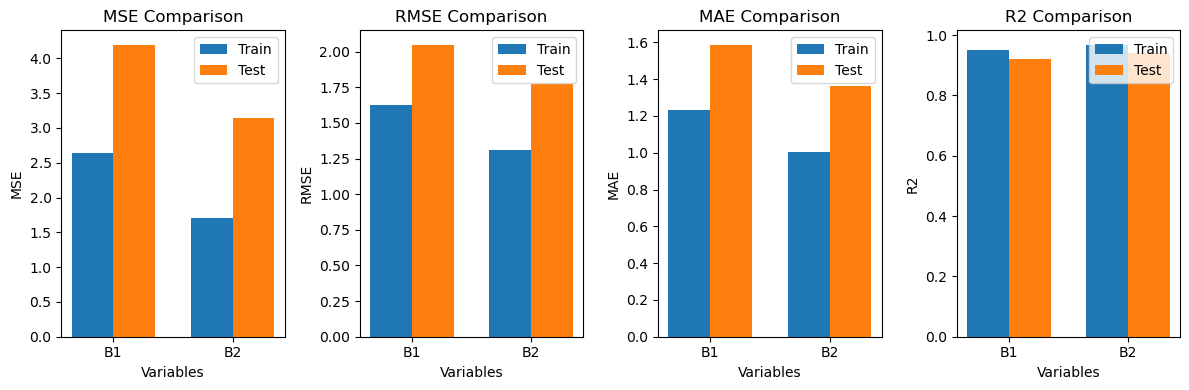

In [10]:
# Assigning dictionary of metrics to variable.
B1_B2_metrics = {'B1':CVAO_F_data, 'B2':GEOS_CVAO_F_data}

# Creating lists of labels for metrics and models.
metrics = ['mse', 'rmse', 'mae', 'r2']
variables = ['B1', 'B2']

# Creating subplots.
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs = axs.flatten()

# Looping through each metrics for each model and plotting barchart.
for i, metric in enumerate(metrics):
    ax = axs[i]
    
    train_values = [B1_B2_metrics[var]['train'][metric] for var in variables]
    test_values = [B1_B2_metrics[var]['test'][metric] for var in variables]
    
    x = np.arange(len(variables))
    width = 0.35
    
    ax.bar(x - width/2, train_values, width, label='Train')
    ax.bar(x + width/2, test_values, width, label='Test')
    
    ax.set_xlabel('Variables')
    ax.set_ylabel(metric.upper())
    ax.set_title(f'{metric.upper()} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(variables)
    ax.legend()

# Saving and showing plot.
plt.tight_layout()
plt.savefig(f'/Users/callumwilson/Documents/GitHub/ML-Project/Output/B1_B2_metrics', bbox_inches='tight')
plt.show()

# Analysis of Missing Data for CVAO Dataset Fit to Timeframe of GEOS-FP Dataset

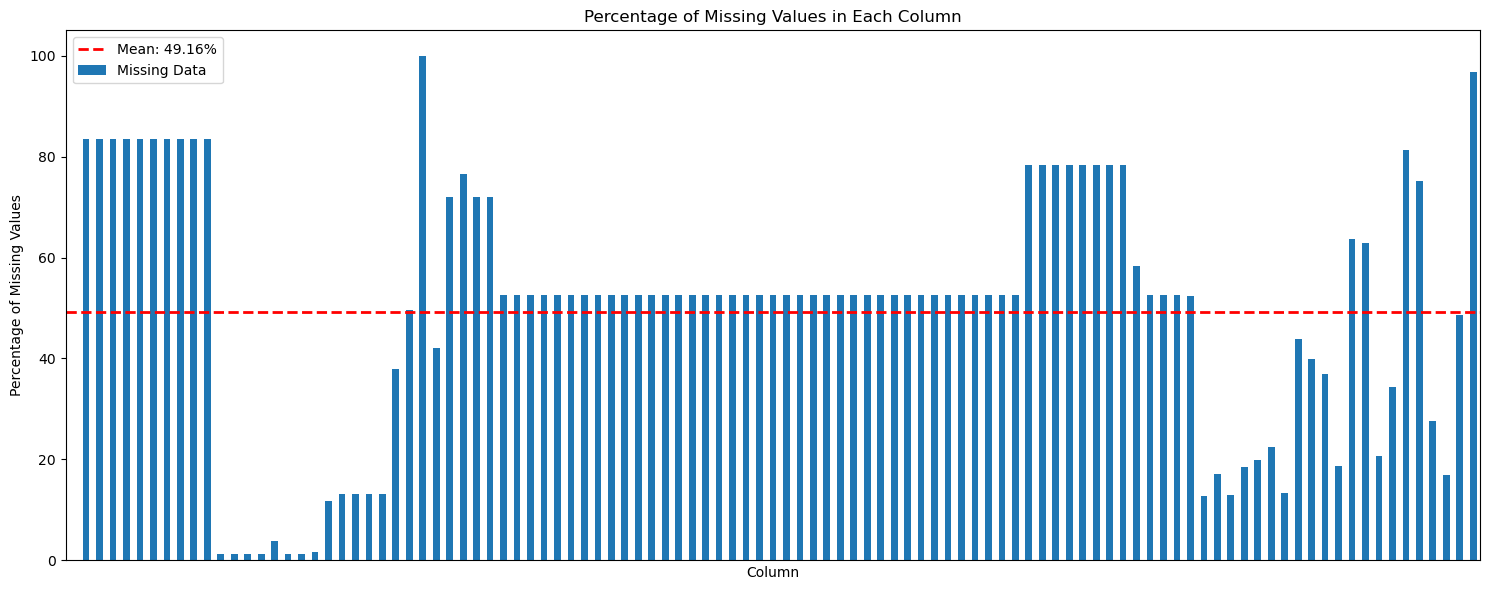

In [14]:
# Calculating the percentage missing for each variable.
# Assigning DataFrame of missing percentages to variable.
missing_percentage = CVAO_filt.isnull().mean() * 100
missing_df = pd.DataFrame(missing_percentage, columns=['Missing Data'])

# Plotting a barchart.
plt.figure(figsize=(15, 6))
missing_df['Missing Data'].plot(kind='bar')

# Calculating mean of missing data.
mean_missing = missing_df['Missing Data'].mean()

# Plotting line for mean of missing data.
plt.axhline(mean_missing, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_missing:.2f}%')

# Customising plot.
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Column')
plt.ylabel('Percentage of Missing Values')
plt.xticks([])
plt.legend()
plt.tight_layout()

# Saving and showing plot.
plt.savefig(f'/Users/callumwilson/Documents/GitHub/ML-Project/Output/B1_missing_barchart', bbox_inches='tight')
plt.show()